## Import our libraries and create some static dataframes to use.

In [92]:
import davidstools as my
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import regplot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import numpy as np
import scipy.stats as stats

COVID_DATA = pd.read_csv('./data/super_covid_data.csv')
DEATH_DATA = pd.read_csv('./data/covid_deaths_usafacts.csv')
CASE_DATA = pd.read_csv('./data/covid_confirmed_usafacts.csv')
POPULATION = pd.read_csv('./data/covid_county_population_usafacts.csv')
META_COLUMNS = ['countyFIPS', 'County Name', 'State', 'StateFIPS']
EMPLOYMENT = pd.read_excel('./data/allhlcn20.xlsx')

data = [CASE_DATA, DEATH_DATA]
texas = []

for frame in data:
    subframe = my.extract_state_data('TX', frame)
    texas.append(my.select_dates(subframe, '2020-06-01', '2021-01-03'))

## Modify the dataframes to represent increases and decreases in cases.

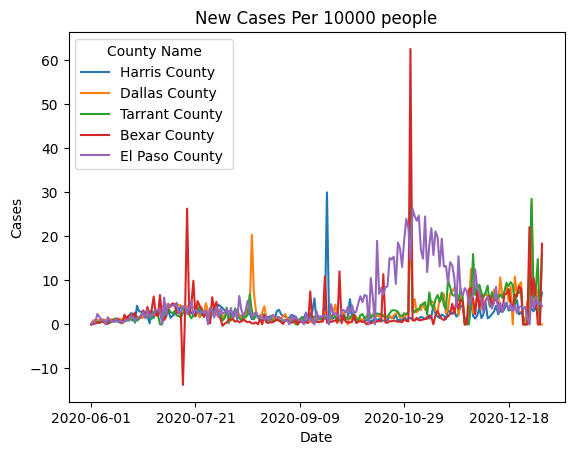

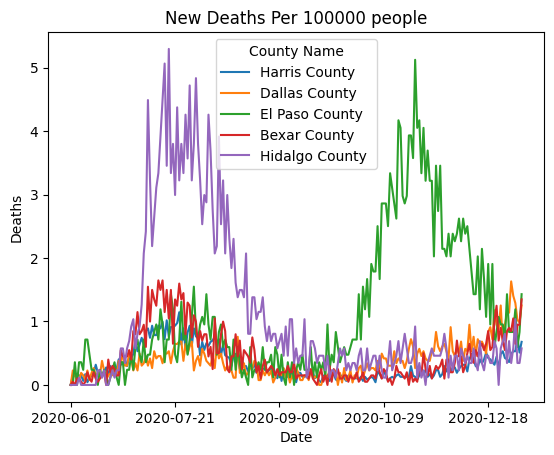

In [93]:
texas_5 = []

for frame in texas:
    subframe = my.top_5(frame, '2021-01-03')
    texas_5.append(subframe)

texas_5_change = []

for frame in texas_5:
    subframe = my.correct_numbers(frame)
    texas_5_change.append(subframe)


titles = ['New Cases Per 10000 people', 'New Deaths Per 100000 people']
norm = [10000, 100000]
variables = ['Cases', 'Deaths']
i = 0
for frame in texas_5_change:
    normFrame = my.normalize_pop(frame, POPULATION, norm[i])
    transpose = normFrame.drop(columns=['countyFIPS','State', 'StateFIPS']).set_index('County Name').T  
    transpose.plot(kind='line')
    plt.title(titles[i])
    plt.xlabel('Date')
    plt.ylabel(variables[i])
    i+=1

    

## Plot this data

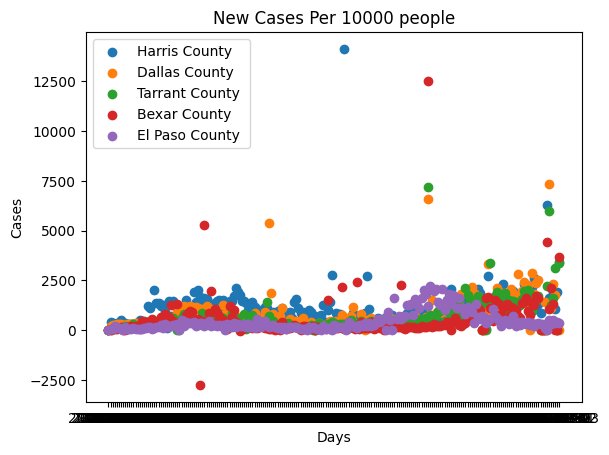

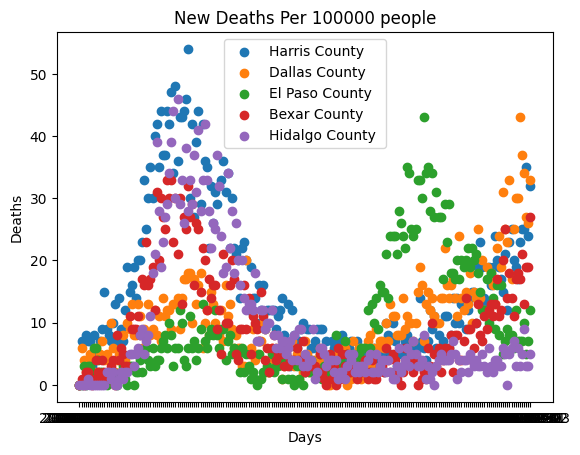

In [94]:
i=0
for frame in texas_5_change:
    new_frame = frame.drop(columns=['countyFIPS','State', 'StateFIPS']).set_index('County Name')
    counties = new_frame.index.to_list()
    x = new_frame.T.index.to_list()
    for county in counties:
        plt.scatter(y=new_frame.loc[county], x=x)
    plt.legend(counties)
    plt.title(titles[i])
    plt.xlabel('Days')
    plt.ylabel(variables[i])
    plt.show()
    i+=1



# Make regression lines for each of these datasets and calculate their MSE

The RMSE of Harris County  is [2.3523195]
The RMSE of Dallas County  is [3.20206615]
The RMSE of Tarrant County  is [3.39290358]
The RMSE of Bexar County  is [5.32086438]
The RMSE of El Paso County  is [5.16706135]


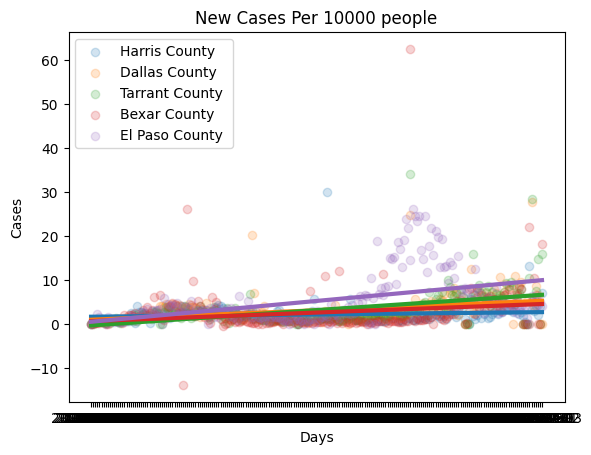

The RMSE of Harris County  is [0.24382224]
The RMSE of Dallas County  is [0.24067577]
The RMSE of El Paso County  is [0.87981496]
The RMSE of Bexar County  is [0.40401593]
The RMSE of Hidalgo County  is [1.15591008]


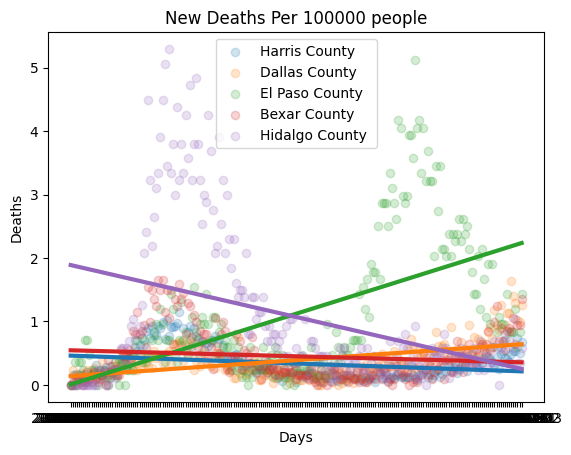

In [95]:
i=0
for frame in texas_5_change:
    normFrame = my.normalize_pop(frame, POPULATION, norm[i])
    new_frame = normFrame.drop(columns=['countyFIPS','State', 'StateFIPS']).set_index('County Name')
    counties = new_frame.index.to_list()
    x = new_frame.T.index.to_list() 

    X = np.arange(len(new_frame.T)).reshape(-1, 1)

    for county in counties:
        plt.scatter(y=new_frame.loc[county], x=x, alpha=0.2)

    j=0
    for county in counties:
        y_true = new_frame.loc[county]
        y = new_frame[new_frame.index == county].T
        regr = LinearRegression()
        regr.fit(X, y)
        y_pred = regr.predict(X)

        error = root_mean_squared_error(y_true, y_pred, multioutput='raw_values')
        message = f"The RMSE of {counties[j]} is {error}"

        print(message)
        j+=1

        plt.plot(x, y_pred, linewidth=3)
    plt.legend(counties)
    plt.title(titles[i])
    plt.xlabel('Days')
    plt.ylabel(variables[i])
    plt.show()
    i+=1

# Calculate a regression line again, but this time include a visualization of confidence.

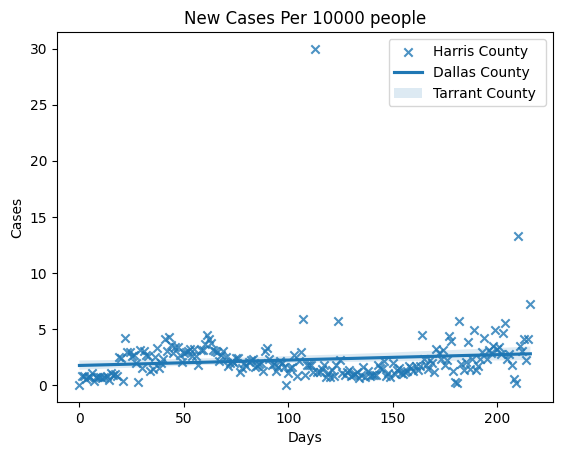

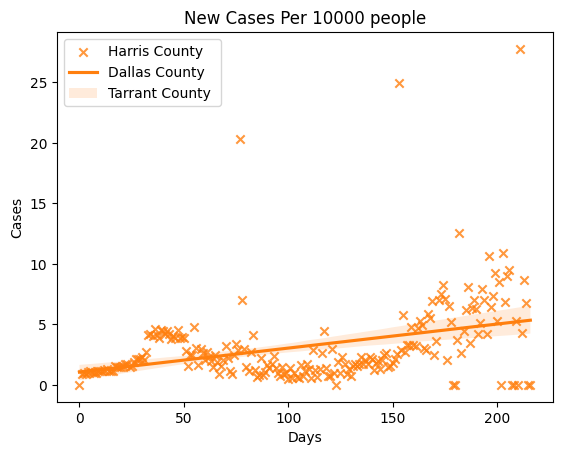

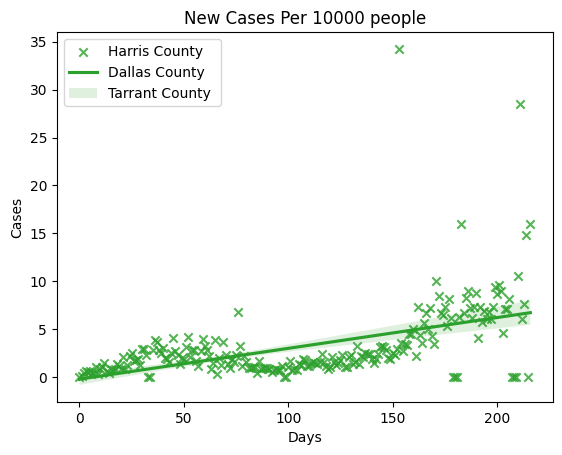

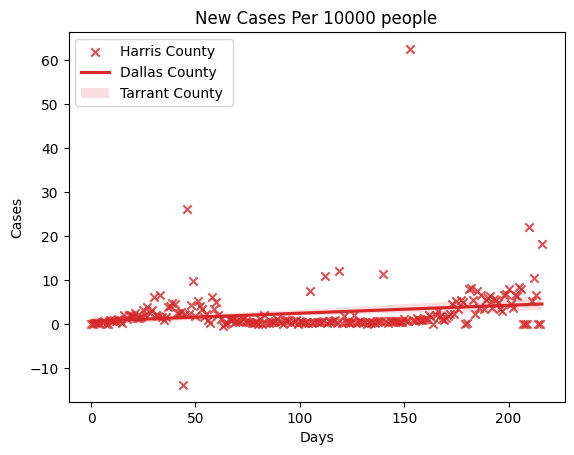

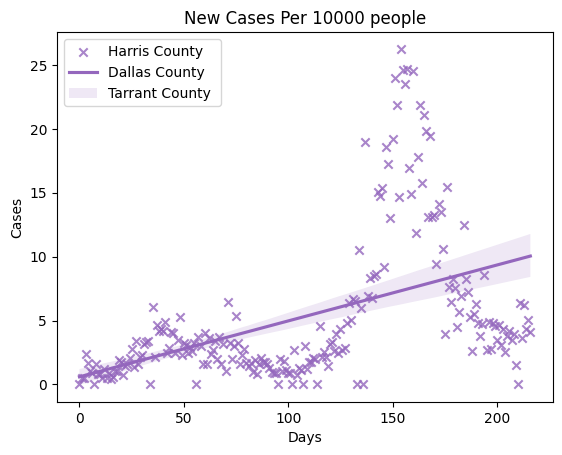

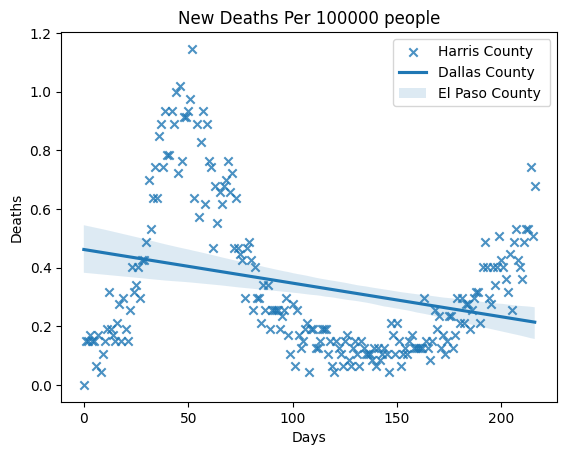

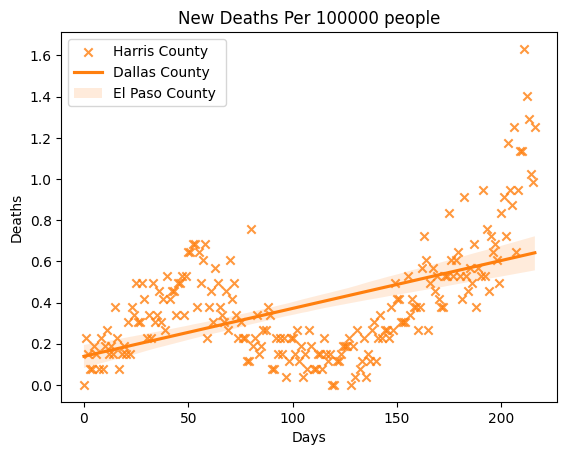

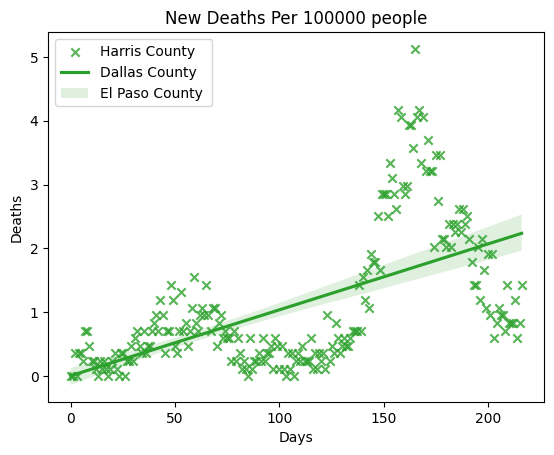

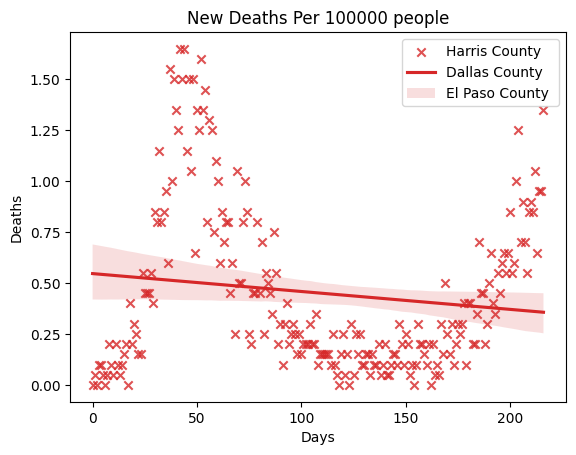

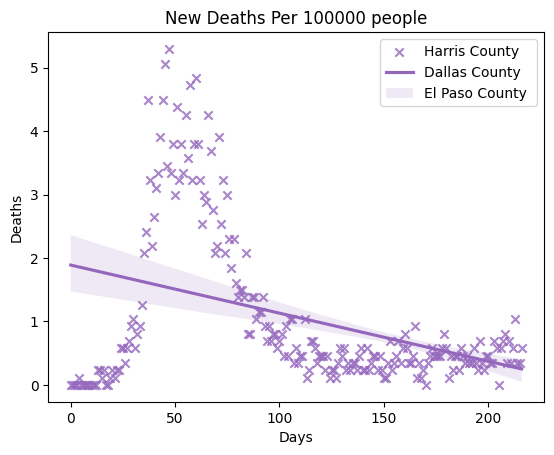

In [96]:
i=0
for frame in texas_5_change:
    normFrame = my.normalize_pop(frame, POPULATION, norm[i])
    new_frame = normFrame.drop(columns=['countyFIPS','State', 'StateFIPS']).set_index('County Name')
    counties = new_frame.index.to_list()
    x = new_frame.T.index.to_list()

    x_array = np.arange(len(x))

    X = np.arange(len(new_frame.T)).reshape(-1, 1)

    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

    j=0
    for county in counties:
        y = new_frame[new_frame.index == county].T

        regplot(x=x_array, y=y, color=colors[j], marker='x')

        plt.legend(counties)
        plt.title(titles[i])
        plt.xlabel('Days')
        plt.ylabel(variables[i])
        plt.show()
        j+=1
    i+=1

## Do it again but using polynomial regression.

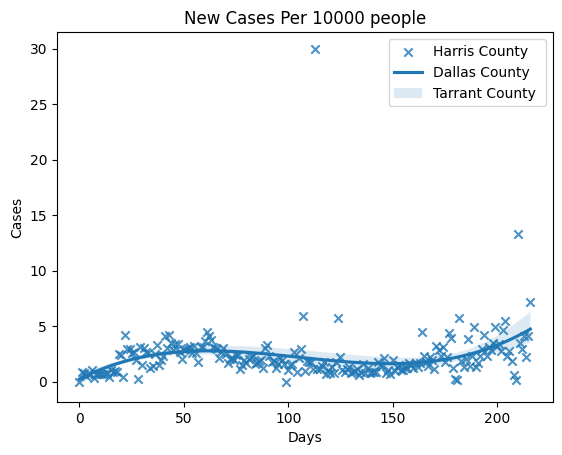

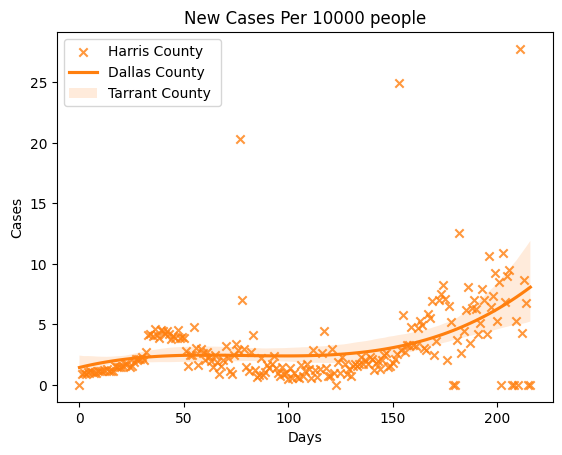

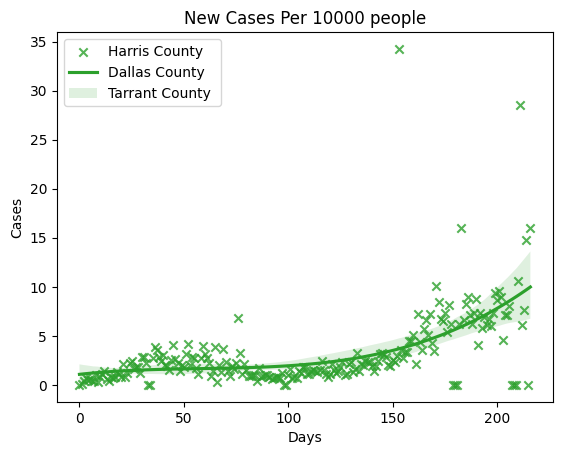

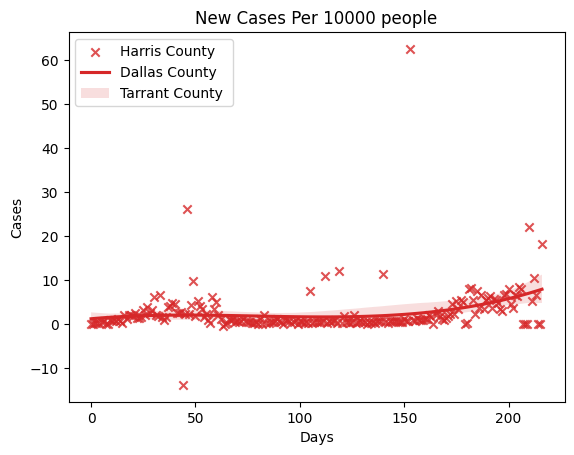

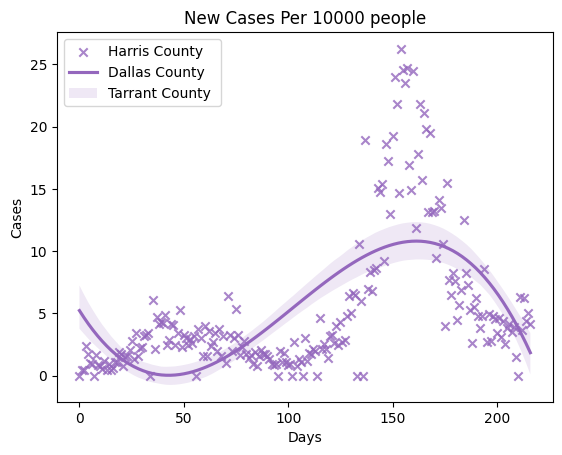

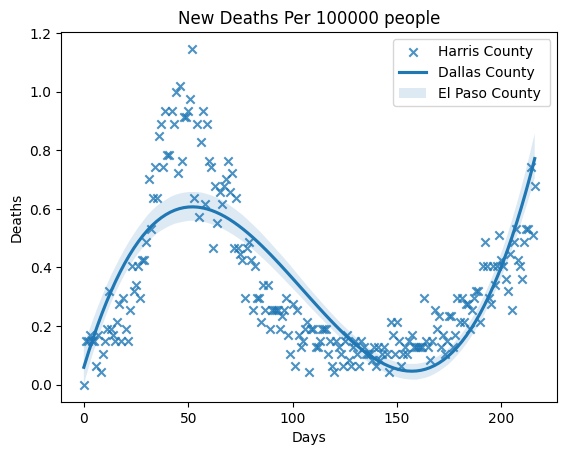

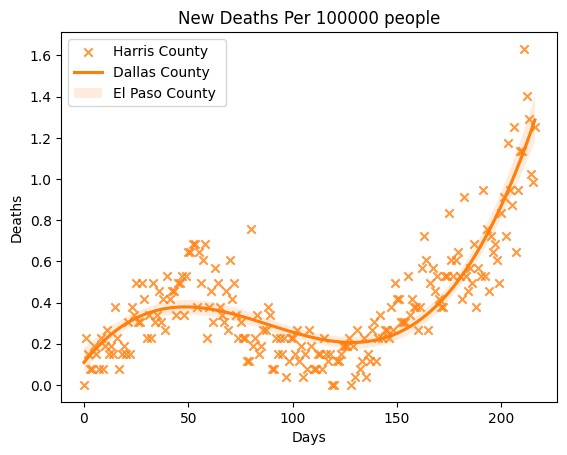

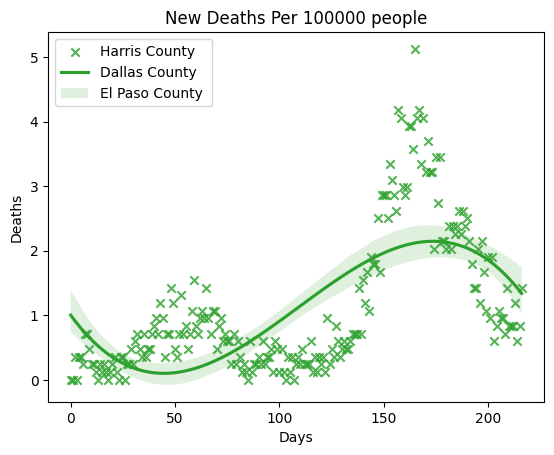

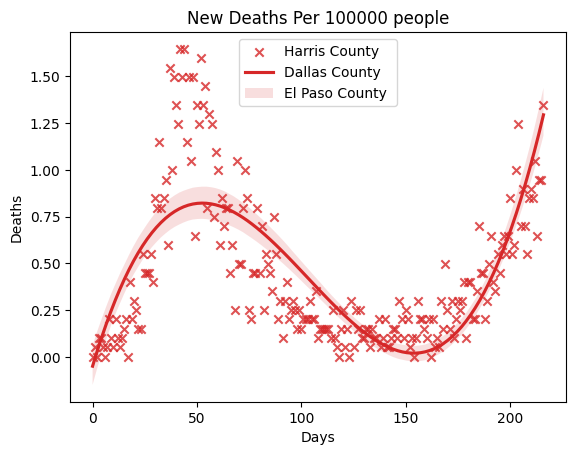

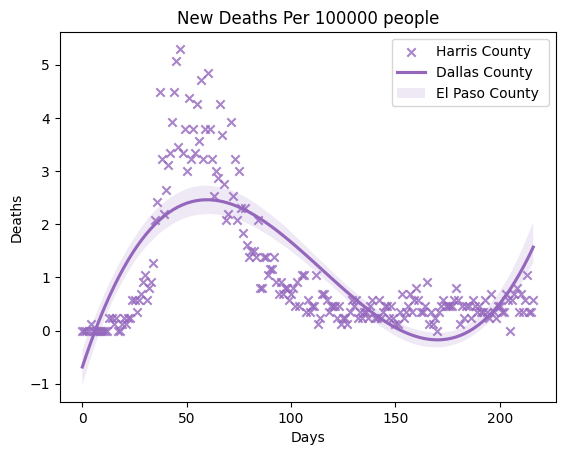

In [97]:
i=0
for frame in texas_5_change:
    normFrame = my.normalize_pop(frame, POPULATION, norm[i])
    new_frame = normFrame.drop(columns=['countyFIPS','State', 'StateFIPS']).set_index('County Name')
    counties = new_frame.index.to_list()
    x = new_frame.T.index.to_list()

    x_array = np.arange(len(x))

    X = np.arange(len(new_frame.T)).reshape(-1, 1)

    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

    j=0
    for county in counties:
        y = new_frame[new_frame.index == county].T

        regplot(x=x_array, y=y, color=colors[j], order=3, marker='x')

        plt.legend(counties)
        plt.title(titles[i])
        plt.xlabel('Days')
        plt.ylabel(variables[i])
        plt.show()
        j+=1
    i+=1

# Hypothesis Testing

## Predicitons:

I think there will be a negative correlation between annual average establishment count in the health and education sector and deaths.

I think there will be a positive correlation between anual average establishment count in liesure and hospitality and cases.

I think there will be a positive correlation between anual average employment in service providing industries and cases.

In [98]:
# Construct a Dataframe holding the data I am curious about.

mergeable_employment = EMPLOYMENT.copy()
mergeable_employment = mergeable_employment[mergeable_employment['St Name'] == 'Texas']
texas_employment = mergeable_employment[mergeable_employment['Area Type'] == 'County']

#texas_employment['countyFIPS'] = 
texas_employment = texas_employment.drop(columns=['Area\nCode'])
start = mergeable_employment['Area\nCode'].astype(int)
texas_employment.insert(0, 'countyFIPS',start)
# Health and Education data
texas_HE = texas_employment[texas_employment['Industry'] =='1025 Education and health services']
# Liesure and Hospitality data
texas_LH = texas_employment[texas_employment['Industry'] =='1026 Leisure and hospitality']
#Service providing
texas_SP = texas_employment[texas_employment['Industry'] =='102 Service-providing']


texas_deaths = my.select_dates(my.extract_state_data('TX', DEATH_DATA), '2021-01-03', '2021-01-03')
texas_cases = my.select_dates(my.extract_state_data('TX', CASE_DATA), '2021-01-03', '2021-01-03')

texas_HE_C = texas_cases.merge(texas_HE, how='inner', on='countyFIPS')
texas_LH_C= texas_cases.merge(texas_LH, how='inner', on='countyFIPS')
texas_SP_C= texas_cases.merge(texas_SP, how='inner', on='countyFIPS')

texas_HE_D = texas_deaths.merge(texas_HE, how='inner', on='countyFIPS')
texas_LH_D= texas_deaths.merge(texas_LH, how='inner', on='countyFIPS')
texas_SP_D= texas_deaths.merge(texas_SP, how='inner', on='countyFIPS')

## Testing our Hypothesis

In [99]:
col1 = texas_HE_D['2021-01-03'] 
col2 = texas_HE_D['Annual Average Establishment Count']
t_stat, p_val = stats.ttest_ind(col1, col2, equal_var=False, alternative='less')
print(f"P-value: {p_val}")
print(f"Reject Null Hypothesis: {p_val < 0.05}")

P-value: 0.007494723419338114
Reject Null Hypothesis: True


### I think there will be a negative correlation between annual average establishment count in the health and education sector and deaths.

We reject this hypothesis.  As you can see above the P-value is not significant enough.


In [100]:
col1 = texas_LH_C['2021-01-03'] 
col2 = texas_LH_C['Annual Average Establishment Count']
t_stat, p_val = stats.ttest_ind(col1, col2, equal_var=False, alternative='greater')
print(f"P-value: {p_val}")
print(f"Reject Null Hypothesis: {p_val < 0.05}")

P-value: 7.5630389482510535e-06
Reject Null Hypothesis: True


### I think there will be a positive correlation between anual average establishment count in liesure and hospitality and cases.

We reject this hypothesis as well.  As you can see the above the P-value is not significant enough.

In [101]:
col1 = texas_LH_C['2021-01-03'] 
col2 = texas_LH_C['Annual Average Employment']
t_stat, p_val = stats.ttest_ind(col1, col2, equal_var=False, alternative='greater')
print(f"P-value: {p_val}")
print(f"Reject Null Hypothesis: {p_val < 0.05}")

P-value: 0.10149950173602042
Reject Null Hypothesis: False


### I think there will be a positive correlation between anual average employment in service providing industries and cases.

We fail to reject the null hypothesis here.  As you can see there is a significant relationship between service providing industries and case numbers.